## Lab | Feature engineering

Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('C:/Users/ameli/IRONHACK/WEEK_7/DAY_1/MORNING_SESSION/learningSet.csv')

C:\Users\ameli\AppData\Local\Temp\ipykernel_23288\3771887276.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/ameli/IRONHACK/WEEK_7/DAY_1/MORNING_SESSION/learningSet.csv')


In [3]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

**Check for null values in the numerical columns.**

In [4]:
numerical = data.select_dtypes(include = np.number)
print(numerical.shape)
numerical.head()

(95412, 407)


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [5]:
def nan_columns_above_threshold (df, percentual_threshold):
    nan_df = pd.DataFrame(df.isna().sum()/len(data)).reset_index()
    nan_df.columns = ['column_name', 'null_percentage']
    nan_above_threshold = nan_df[nan_df['null_percentage'] > percentual_threshold]
    return list(nan_above_threshold['column_name'])

In [6]:
cols_with_nan = nan_columns_above_threshold(numerical, 0)
print(cols_with_nan)
print(len(cols_with_nan))

['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'MSA', 'ADI', 'DMA', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24'

In [7]:
for col in cols_with_nan:
    print('---', col, '---')
    print('Unique values:')
    print(numerical[col].unique(), '\n')
    print('Value counts')
    print(numerical[col].value_counts())
    print('\n')

--- AGE ---
Unique values:
[60. 46. nan 70. 78. 38. 65. 75. 72. 44. 62. 82. 74. 54. 42. 84. 49. 69.
 88. 30. 51. 66. 61. 68. 83. 45. 40. 48. 34. 80. 36. 50. 41. 71. 47. 33.
 63. 64. 59. 77. 73. 87. 89. 86. 52. 76. 26. 58. 39. 92. 81. 56. 79. 37.
 67. 57. 85. 53. 55. 94. 93. 43. 97. 90. 31. 29. 91. 28. 32. 35. 21. 27.
 24. 96. 95. 20. 98. 19. 22. 25. 23. 13. 16. 18. 11.  2.  1.  9. 17.  7.
  6. 10.  4. 14.  8.  3. 15.] 

Value counts
50.0    1930
76.0    1885
72.0    1813
68.0    1809
74.0    1801
        ... 
8.0        1
9.0        1
10.0       1
6.0        1
15.0       1
Name: AGE, Length: 96, dtype: int64


--- NUMCHLD ---
Unique values:
[nan  1.  2.  3.  4.  5.  6.  7.] 

Value counts
1.0    7792
2.0    3110
3.0    1101
4.0     316
5.0      59
6.0       7
7.0       1
Name: NUMCHLD, dtype: int64


--- INCOME ---
Unique values:
[nan  6.  3.  1.  4.  2.  7.  5.] 

Value counts
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtyp

Name: ADATE_10, dtype: int64


--- ADATE_11 ---
Unique values:
[9510. 9509. 9511.   nan 9508.] 

Value counts
9510.0    58631
9509.0    22160
9511.0     4133
9508.0       66
Name: ADATE_11, dtype: int64


--- ADATE_12 ---
Unique values:
[9508. 9509.   nan 9510. 9507.] 

Value counts
9508.0    49299
9509.0    36442
9510.0      686
9507.0       62
Name: ADATE_12, dtype: int64


--- ADATE_13 ---
Unique values:
[9507.   nan 9502. 9506.] 

Value counts
9507.0    54713
9502.0      280
9506.0      200
Name: ADATE_13, dtype: int64


--- ADATE_14 ---
Unique values:
[9506.   nan 9504.] 

Value counts
9506.0    76381
9504.0      164
Name: ADATE_14, dtype: int64


--- ADATE_15 ---
Unique values:
[9504.   nan] 

Value counts
9504.0    29935
Name: ADATE_15, dtype: int64


--- ADATE_16 ---
Unique values:
[9503.   nan 9504. 9502.] 

Value counts
9503.0    73422
9504.0     1502
9502.0      124
Name: ADATE_16, dtype: int64


--- ADATE_17 ---
Unique values:
[9502.   nan 9501. 9503.] 

Value counts
9502.0

Name: RAMNT_4, dtype: int64


--- RAMNT_5 ---
Unique values:
[nan 50. 12.  8. 31. 10.  5. 13.  4. 20.] 

Value counts
50.0    1
12.0    1
8.0     1
31.0    1
10.0    1
5.0     1
13.0    1
4.0     1
20.0    1
Name: RAMNT_5, dtype: int64


--- RAMNT_6 ---
Unique values:
[   nan  15.    21.    11.     7.     5.    10.    18.    16.     1.
  12.    19.     6.    30.     8.    24.     4.     9.    27.    17.
  20.    13.    35.     2.86   2.    25.    14.    40.    50.     3.
  37.    23.    26.    60.    51.   100.    31.    22.    47.    41.
  13.11] 

Value counts
10.00     133
15.00      82
5.00       82
20.00      73
25.00      49
12.00      43
7.00       33
11.00      29
3.00       25
16.00      25
13.00      23
17.00      18
6.00       17
9.00       16
8.00       14
50.00      14
30.00      12
14.00      12
18.00       9
21.00       8
19.00       8
2.00        7
4.00        7
27.00       6
35.00       6
24.00       3
40.00       3
1.00        3
23.00       2
26.00       2
60.00      

**Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.**

Bear in mind that Geocode2 column is not considered as numerical type.

- GEOCODE2: County Size Code.

In [8]:
print('Unique values:', data['GEOCODE2'].unique())
data['GEOCODE2'].value_counts(dropna=False)

Unique values: ['C' 'A' 'D' 'B' ' ' nan]


A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

We should first replace white spaces with nan


In [9]:
data['GEOCODE2'] = data['GEOCODE2'].replace(' ', np.nan)
print('Unique values:', data['GEOCODE2'].unique())
data['GEOCODE2'].value_counts(dropna=False)

Unique values: ['C' 'A' 'D' 'B' nan]


A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

As the number of null values is relatively low, we can impute these values with the mode.

In [10]:
mode_geocode2 = data['GEOCODE2'].mode()[0]
print('Mode value:', mode_geocode2)

Mode value: A


In [11]:
data['GEOCODE2'] = data['GEOCODE2'].fillna(mode_geocode2)
print('Unique values:', data['GEOCODE2'].unique())
data['GEOCODE2'].value_counts(dropna=False)

Unique values: ['C' 'A' 'D' 'B']


A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

* WEALTH1: Wealth Rating

In [12]:
numerical['WEALTH1'].unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

In [13]:
print('Unique values:', numerical['WEALTH1'].unique())
numerical['WEALTH1'].value_counts(dropna=False)

Unique values: [nan  9.  1.  4.  2.  6.  0.  5.  8.  3.  7.]


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

It seems that there are so many missing values that we may consider dropping this column. Let's calculate the null percentage and decide what to do with this column.

In [14]:
wealth_null_percentage = (numerical['WEALTH1'].isna().sum()/len(numerical))*100
wealth_null_percentage

46.882991657233895

Ok, there are too many missing values. But the manager told us that this column is important, so instead of dropping it, we're going to imputate the missing values.

In [15]:
numerical['WEALTH1_PLOTS'] = numerical['WEALTH1'].copy()
mean = np.mean(numerical['WEALTH1'].notna())
print('Mean:', mean)
median = np.median(numerical['WEALTH1'].notna())
print('Median:', median)

Mean: 0.5311700834276611
Median: 1.0


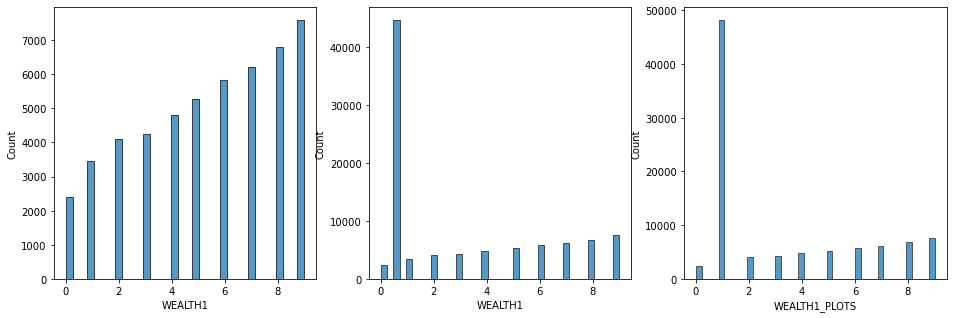

In [16]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['WEALTH1'], ax = ax[0])
sns.histplot(numerical["WEALTH1"].fillna(mean), ax = ax[1])
sns.histplot(numerical['WEALTH1_PLOTS'].fillna(median),ax = ax[2])
plt.show()

Probably not a good idea to impute the missing values with the mean or the median, although if we need to choose one method, we'd probably go with the mean. Maybe the best option would be to try KNNImputer but in order to do so, we may want to reduce the number of data frame columns first. 

In [17]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(mean)
numerical['WEALTH1'].isna().sum()

0

* ADI: ADI code.

In [18]:
print('Unique values:', numerical['ADI'].unique())
numerical['ADI'].value_counts(dropna=False)

Unique values: [177.  13. 281.  67. 127. 185.  91. 251. 391. 181. 269.  83. 107. 249.
 291.  57. 227. 329. 351.  55. 133.  51.  73. 159. 201.  75. 233. 591.
 203. 175.  59. 105. 111. 173. 415. 323. 187.  65. 412. 109. 425. 405.
 197. 279. 645. 207.  89. 361. 209. 213.  15.  21. 113. 131. 469. 199.
 129. 441. 459. 235. 301.  39. 429. 285. 245. 335. 393. 577. 439. 455.
 383. 263.   0. 427. 307. 275. 119. 229. 273. 325. 371. 377. 315. 342.
 421. 219.  61.  93. 375. 283. 381. 243. 353. 613. 339. 367. 417. 299.
 271. 157.  77. 327.  53.  87. 451. 627.  71. 253. 363. 403. 115. 389.
  63. 321. 448. 237. 217. 241. 123. 221. 165. 277.  85. 319. 247.  69.
 379.  95.  17. 625. 462. 303. 179. 331. 231. 337. 257. 409. 457. 359.
 373.  nan 413. 215. 205. 313. 211. 305. 355. 419. 473. 423. 121. 433.
 431. 465. 445.  19. 467. 255. 437. 117. 449. 195. 435. 621. 295.  11.
 183. 265. 317.   9.   3. 151. 471. 293. 297. 603. 385.  33. 261.  25.
 443.  29. 357. 135.  35. 143. 153. 149.  47. 140.  43. 141. 2

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [19]:
adi_null_percentage = (numerical['ADI'].isna().sum()/len(numerical))*100
print('% of nan values:', round(adi_null_percentage,2))

% of nan values: 0.14


* DMA: Designated Market Areas code.

In [20]:
print('Unique values:', numerical['DMA'].unique())
numerical['DMA'].value_counts(dropna=False)

Unique values: [682. 803. 518. 862. 528. 691. 509. 643. 624. 659. 671. 527. 613. 716.
 770. 505. 717. 534. 560. 547. 571. 602. 800. 638. 618. 609. 820. 821.
 635. 675. 563. 819. 617. 637. 606. 709. 632. 807. 698. 623. 507. 627.
 524. 517. 539. 649. 868. 546. 529. 567. 825. 512. 669. 764. 575. 548.
 662. 811. 801. 652. 771. 603. 556. 622. 561. 724. 804. 633. 839. 686.
 650. 743. 619. 678. 753. 610. 745. 604. 749. 670. 765. 711. 553. 762.
 520. 503. 551. 515. 647. 544.   0. 676. 752. 545. 754. 810. 790. 656.
 755. 641. 616. 628. 588. 581. 540. 658. 583. 866. 642. 746. 634. 648.
 705. 725. 744. 513. 612. 813. 531. 751. 500. 630. 611. 789. 582. 693.
 692. 828. 626. 710. 542. 855. 687. 679. 640. 722. 620. 881. 564. 522.
 756. 570. 718.  nan 530. 557. 625. 541. 657. 631. 550. 525. 605. 773.
 519. 535. 600. 734. 759. 757. 511. 798. 802. 644. 651. 702. 737. 767.
 673. 736. 636. 592. 758. 504. 639. 501. 506. 523. 760. 766. 646. 740.
 574. 598. 533. 661. 508. 537. 514. 510. 577. 549. 532. 521. 5

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [21]:
dma_null_percentage = (numerical['DMA'].isna().sum()/len(numerical))*100
print('% of nan values:', round(dma_null_percentage,2))

% of nan values: 0.14


* MSA: Metropolitan Statistical Area code.

In [22]:
print('Unique values:', numerical['MSA'].unique())
numerical['MSA'].value_counts(dropna=False)

Unique values: [   0. 4480. 9340. 5000. 2030. 3960. 5360. 3480.  760. 2160. 5960. 5120.
  440. 6580. 1600.  680. 3360. 7040. 2920. 3120. 6440.  640. 6120. 3000.
 7600. 2680. 5080. 1360. 2180. 4420. 1960. 6640. 7360. 5945. 1920. 1145.
 7520. 2800. 1520. 7510. 1620. 4520. 7320.  720. 4720. 1560. 8960.   40.
 6720.  520. 9360. 3710. 8280. 6760. 3160. 5560. 3600. 6780. 5800. 4120.
 5160. 5880.  380. 3440. 2710. 2020. 9040. 6200. 6880. 6920. 2760. 7080.
 4080. 2580. 4100. 5790. 4200.  600. 4680. 4040. 1640. 5775. 8720. 3980.
 2240. 1720. 5910. 9260.  200. 7400. 1020. 3290. 2720. 7240. 3800. 8120.
  870. 2320. 3760. 1040. 2840. 3880.  920. 6080.  460.  320. 1400. 3320.
 2640. 8200. 4890. 3660. 2670. 1000. 2520. 2440. 8520. 3720. 2080. 7500.
 3920. 1125. 4400.  840. 7485. 8750. 8735. 1150. 5280. 3285. 7460. 2620.
 7160. 4920. 8600.  880. 2985. 5920. 2655. 3560.   nan 3500. 7720. 7480.
  860. 2330. 7680. 5200. 3400. 3605. 2750. 8240. 3080. 5170. 3150.  480.
 6660. 3840. 2120. 3810. 2960. 7840.

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [23]:
msa_null_percentage = (numerical['MSA'].isna().sum()/len(numerical))*100
print('% of nan values:', round(msa_null_percentage,2))

% of nan values: 0.14


Could it be that those rows that contain missing values in ADI Code column, they contain nan values from MSA and DMA as well?

In [24]:
nan_rows = numerical[numerical['MSA'].isna()]
nan_rows[['MSA', 'ADI', 'DMA']]

,MSA,ADI,DMA
577,NaN,NaN,NaN
1119,NaN,NaN,NaN
2250,NaN,NaN,NaN
3326,NaN,NaN,NaN
5558,NaN,NaN,NaN
...,...,...,...
90627,NaN,NaN,NaN
90993,NaN,NaN,NaN
92870,NaN,NaN,NaN
93624,NaN,NaN,NaN


Ok, we can drop these rows.

In [25]:
nan_rows_idx = list(nan_rows.index)
numerical.drop(nan_rows_idx, axis = 0, inplace = True)
print('Missing values of MSA:', numerical['MSA'].isna().sum())
print('Missing values of DMA:', numerical['DMA'].isna().sum())
print('Missing values of ADI:', numerical['ADI'].isna().sum())

Missing values of MSA: 0
Missing values of DMA: 0
Missing values of ADI: 0
